In [9]:
import tensorflow as tf
import numpy as np
from keras import optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

input_shape = (None, 32, 32, 3)
model.build(input_shape)
model.summary()

adam = optimizers.Adam(lr=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} Test Acc: {1}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 88us/step
Test Loss: 1.3637356815338135 Test Acc: 0.5089


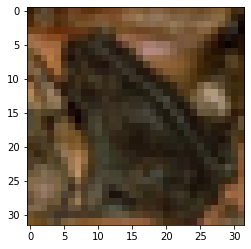

In [13]:
import matplotlib.pyplot as plt

number = 30
(trainx, trainy), (testx, testy) = cifar10.load_data()
plt.imshow(testx[number])

In [12]:
predictions = model.predict([x_test])
i = np.argmax(predictions[number])
categories = ["airplane", "automobile", "bird", "cat", 
              "deer", "dog", "frog", "horse", "ship", "truck"]
print(categories[i])

frog
